# RUN in Google Colab, datasets used are of Default what is in collab.

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [0]:
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('sample_data/mnist_test.csv')


In [13]:
mnist_train.shape, mnist_test.shape

((19999, 785), (9999, 785))

In [29]:
mnist_test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
img = mnist_train[1:2]
img = img.drop('6', axis =1)


In [0]:
img = img.values

In [0]:
# reshaping

img = img.reshape(1, 28,28)

In [20]:
img.shape

(1, 28, 28)

In [21]:
img = img.squeeze()
img.shape

(28, 28)

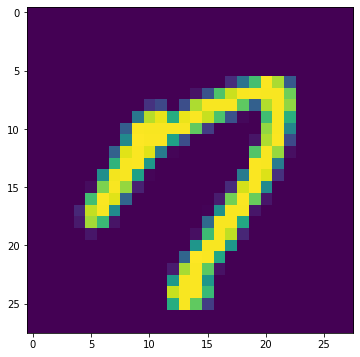

In [22]:
plt.figure(figsize=(6,6))
plt.imshow(img)

In [0]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

In [0]:
mnist_train_features = mnist_train.drop('6', axis =1)
mnist_train_target = mnist_train['6']

In [0]:
mnist_test_features = mnist_test.drop('7', axis =1)
mnist_test_target = mnist_test['7']

In [0]:
mnist_train = mnist_train.astype('float32')
mnist_train = mnist_train / 255

In [0]:
mnist_test = mnist_test.astype('float32')
mnist_test = mnist_test / 255

In [0]:
import torch

In [0]:
X_train_tensor = torch.tensor(mnist_train_features.values, dtype = torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype = torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype = torch.long)
y_test_tensor = torch.tensor(mnist_test_target.values, dtype = torch.long)

In [0]:
import torch.nn as nn

In [0]:
input_size = 784
output_size = 10

hidden1_size = 4
hidden2_size = 8


In [0]:
class Net(nn.Module):
    def __init__(self):
        
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size,hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)
        
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        
        x = self.fc3(x)
        
        return torch.log_softmax(x,dim =1)

In [0]:
model = Net()

In [76]:
model

Net(
  (fc1): Linear(in_features=784, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=10, bias=True)
)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [78]:
device

device(type='cuda', index=0)

In [79]:
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=10, bias=True)
)

In [0]:
X_train_tensor = X_train_tensor.to(device)
x_test_tensor = x_test_tensor.to(device)

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor =  y_test_tensor.to(device)

In [0]:
import torch.optim as optim

In [0]:
optimizer= optim.Adam(model.parameters())

In [0]:
loss_fn = nn.NLLLoss()


In [0]:
epochs =500

In [92]:
for i  in range(1, epochs+1):
  optimizer.zero_grad()
  Y_pred = model(X_train_tensor)
  loss = loss_fn(Y_pred, Y_train_tensor)

  loss.backward()
  optimizer.step()

  if i%10 ==0:
    print('Epoch -%d, loss - %0.2f '%(i,loss.item()))

 

Epoch -10, loss - 1.71 
Epoch -20, loss - 1.70 
Epoch -30, loss - 1.71 
Epoch -40, loss - 1.70 
Epoch -50, loss - 1.69 
Epoch -60, loss - 1.69 
Epoch -70, loss - 1.69 
Epoch -80, loss - 1.68 
Epoch -90, loss - 1.68 
Epoch -100, loss - 1.67 
Epoch -110, loss - 1.67 
Epoch -120, loss - 1.67 
Epoch -130, loss - 1.67 
Epoch -140, loss - 1.66 
Epoch -150, loss - 1.66 
Epoch -160, loss - 1.66 
Epoch -170, loss - 1.65 
Epoch -180, loss - 1.65 
Epoch -190, loss - 1.65 
Epoch -200, loss - 1.64 
Epoch -210, loss - 1.64 
Epoch -220, loss - 1.64 
Epoch -230, loss - 1.64 
Epoch -240, loss - 1.63 
Epoch -250, loss - 1.63 
Epoch -260, loss - 1.63 
Epoch -270, loss - 1.63 
Epoch -280, loss - 1.63 
Epoch -290, loss - 1.62 
Epoch -300, loss - 1.62 
Epoch -310, loss - 1.62 
Epoch -320, loss - 1.61 
Epoch -330, loss - 1.61 
Epoch -340, loss - 1.61 
Epoch -350, loss - 1.61 
Epoch -360, loss - 1.60 
Epoch -370, loss - 1.60 
Epoch -380, loss - 1.60 
Epoch -390, loss - 1.60 
Epoch -400, loss - 1.59 
Epoch -41

In [93]:
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=10, bias=True)
)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [98]:
with torch.no_grad():
  correct = 0
  total =0 

  outputs = model(x_test_tensor)
  _, predicted = torch.max(outputs.data, 1)
  print(predicted)
  y_test = y_test_tensor.cpu().numpy()
  predicted = predicted.cpu()

  print('Accuracy:', accuracy_score(predicted, y_test))
  print('Precision:', precision_score(predicted, y_test, average='weighted'))
  print('recall :', recall_score(predicted, y_test, average='weighted'))


tensor([6, 1, 6,  ..., 1, 6, 6], device='cuda:0')
Accuracy: 0.2842284228422842
Precision: 0.9273629626283201
recall : 0.2842284228422842


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
